In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing packages

In [2]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

plt.style.use(style='fivethirtyeight')
pd.options.display.float_format = '{:,.2f}'.format

# Loading the dataset

In [6]:
data = pd.read_csv('Walmart_Sales.csv')

# Viewing the top 10 rows in the dataframe
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11
5,1,12-03-2010,"1,439,541.59",0,57.79,2.67,211.38,8.11
6,1,19-03-2010,"1,472,515.79",0,54.58,2.72,211.22,8.11
7,1,26-03-2010,"1,404,429.92",0,51.45,2.73,211.02,8.11
8,1,02-04-2010,"1,594,968.28",0,62.27,2.72,210.82,7.81
9,1,09-04-2010,"1,545,418.53",0,65.86,2.77,210.62,7.81


In [5]:
# Viewing the bottom 10 rows in the dataframe
data.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,"718,232.26",0,72.62,3.83,191.34,8.68
6426,45,31-08-2012,"734,297.87",0,75.09,3.87,191.46,8.68
6427,45,07-09-2012,"766,512.66",1,75.70,3.91,191.58,8.68
6428,45,14-09-2012,"702,238.27",0,67.87,3.95,191.70,8.68
6429,45,21-09-2012,"723,086.20",0,65.32,4.04,191.86,8.68
6430,45,28-09-2012,"713,173.95",0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,"733,455.07",0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,"734,464.36",0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,"718,125.53",0,56.47,3.97,192.33,8.67
6434,45,26-10-2012,"760,281.43",0,58.85,3.88,192.31,8.67


In [7]:
# Changing the columns to lowercase
data.columns = data.columns.str.lower()

# Confirming the change
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [8]:
# Information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
# The number of columns
a = data.shape[1]

# The number of rows 
b = data.shape[0]

# Number of columns and rows
print(f'There are {a} columns and {b} rows in the dataframe')

There are 8 columns and 6435 rows in the dataframe


In [10]:
# Number of duplicated rows
data.duplicated().sum() 

0

In [11]:
# Number of unique values in each feature
data.nunique()

store             45
date             143
weekly_sales    6435
holiday_flag       2
temperature     3528
fuel_price       892
cpi             2145
unemployment     349
dtype: int64

In [12]:
# Checking for null values
data.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [13]:
# Coverting the Date column to a datetime object
data.date = pd.to_datetime(data['date'], format = '%d-%m-%Y')

# Checking date data type
print(data['date'].dtype)

datetime64[ns]


In [14]:
# Convert the column Holiday_Flag to a categorical type
data['holiday_flag'] = data['holiday_flag'].astype('category')

# Check the data type
print(data['holiday_flag'].dtype)

category


In [15]:
# Mapping 0 to 'working_day' and 1 to 'holiday'
data['holiday_flag'] = data['holiday_flag'].map({0: 'working_day', 1: 'holiday'})

# Display the DataFrame
data.sample(n=3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
4215,30,2011-05-27,"429,305.82",working_day,76.86,3.79,215.15,7.93
4978,35,2012-04-27,"721,212.45",working_day,52.33,4.00,141.96,8.88
3450,25,2010-06-11,"737,163.20",working_day,63.68,2.81,204.67,7.86


In [16]:
# Determining the number of holidays, where Holiday = 1, working day = 0
data['holiday_flag'].value_counts()

holiday_flag
working_day    5985
holiday         450
Name: count, dtype: int64

In [17]:
# Statistics

# Making a copy
data1 = data.copy()

# Droping columns we don't need
data1 = data1.drop(columns = ['date','store', 'holiday_flag'])
data1.describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,"6,435.00","6,435.00","6,435.00","6,435.00","6,435.00"
mean,"1,046,964.88",60.66,3.36,171.58,8.00
std,"564,366.62",18.44,0.46,39.36,1.88
min,"209,986.25",-2.06,2.47,126.06,3.88
25%,"553,350.10",47.46,2.93,131.74,6.89
50%,"960,746.04",62.67,3.44,182.62,7.87
75%,"1,420,158.66",74.94,3.73,212.74,8.62
max,"3,818,686.45",100.14,4.47,227.23,14.31


# Data Visualizations

### Plotting histograms

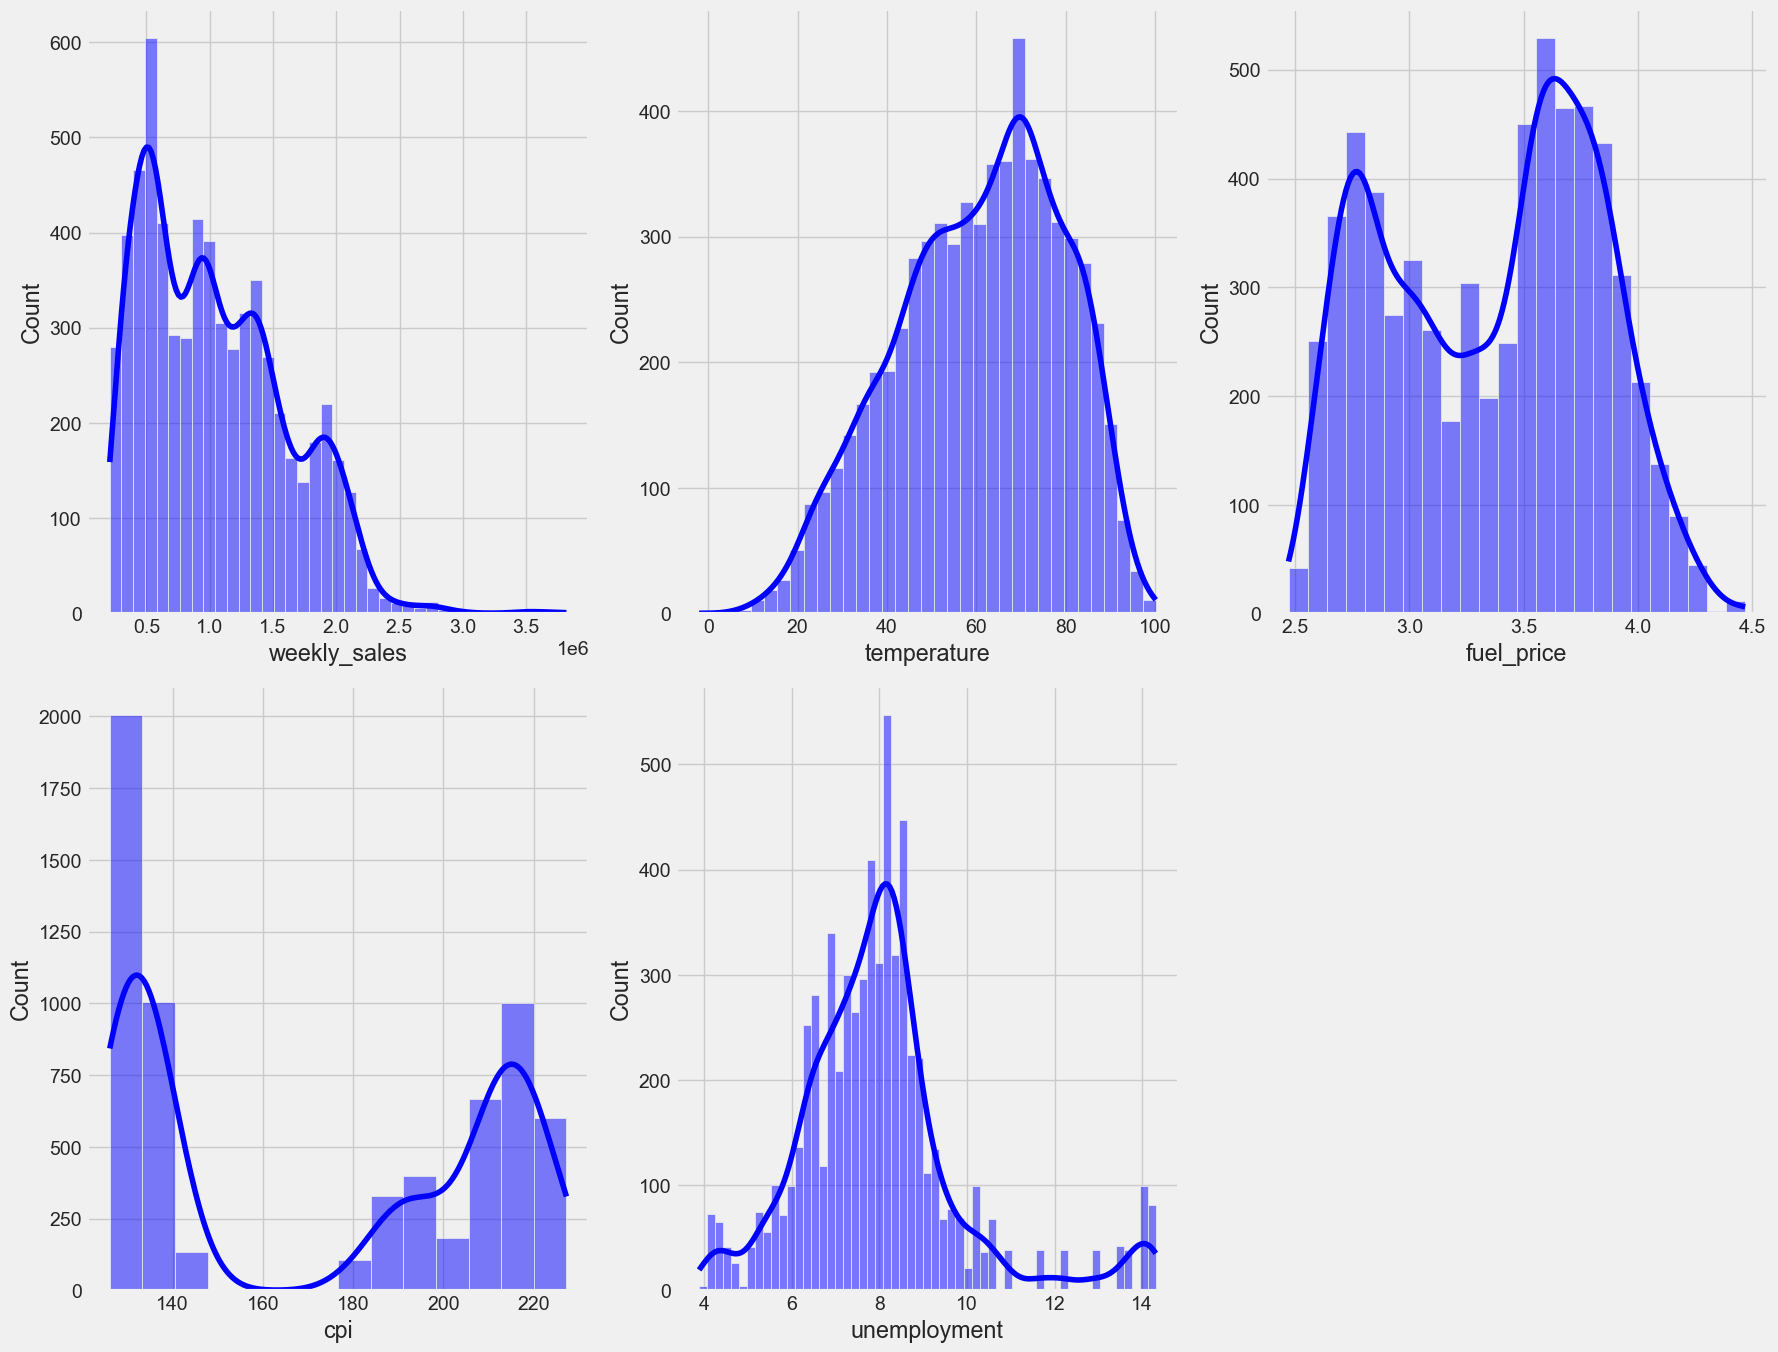

In [19]:
# Figure size
plt.figure(figsize=(18, 20))

# Looping through each column
for i, col in enumerate(data1):
    # Create subplots
    plt.subplot(3, 3, i+1)
    
    # Plot histogram for the current column
    sns.histplot(data=data1, x=col, kde=True, color = 'blue')

plt.tight_layout()
plt.show()

### Box plot

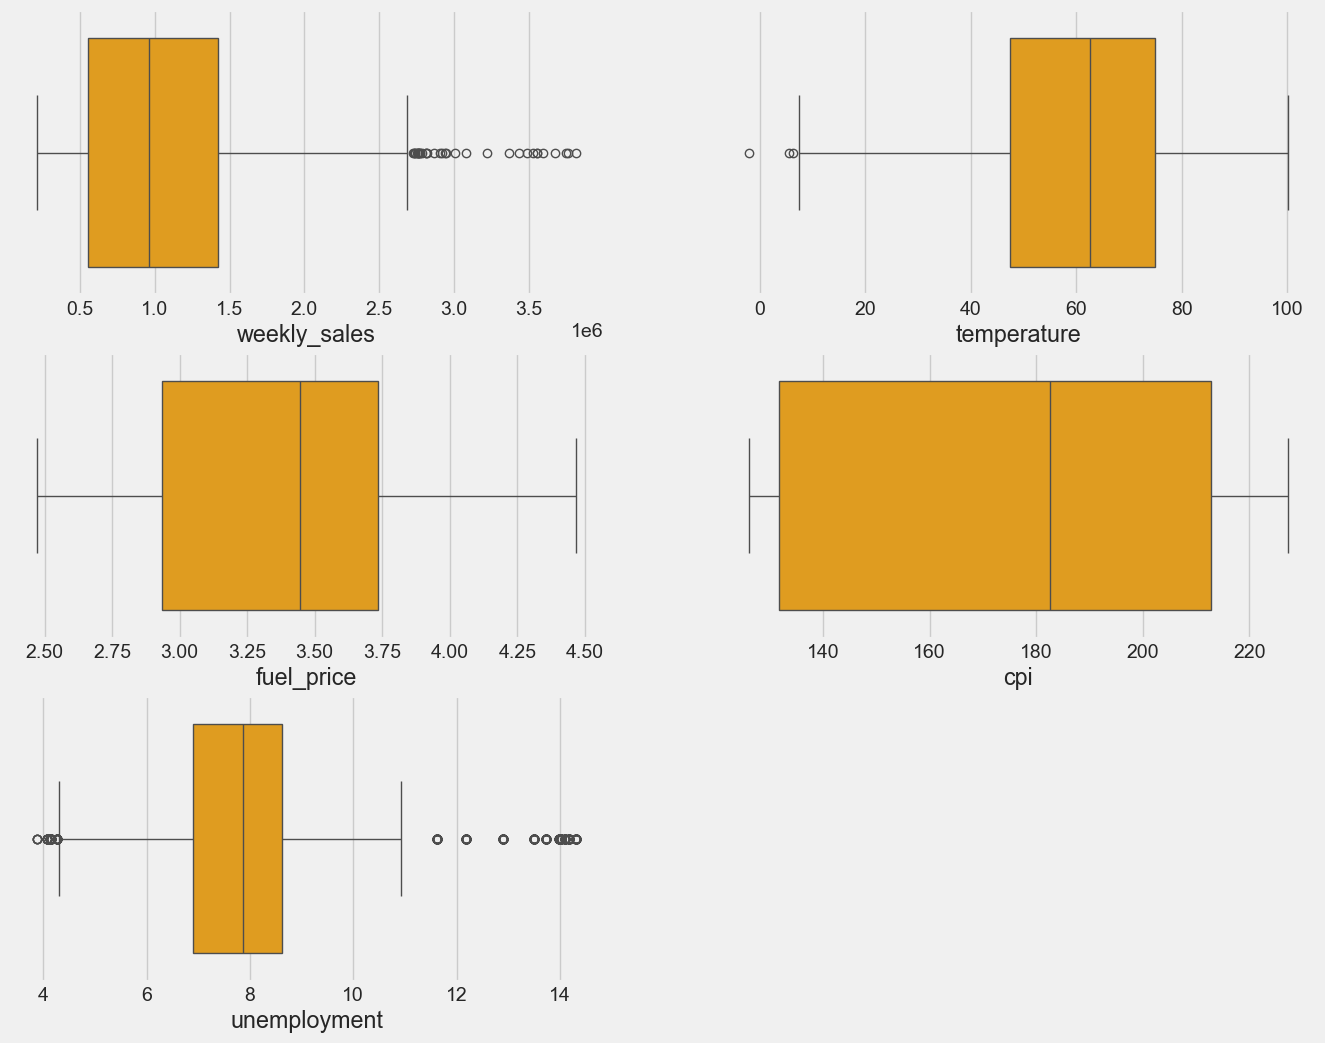

In [20]:
plt.figure(figsize = (15,12))
for i, col in enumerate(data1):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = data1, x = col,color = 'orange') 
plt.show()

# Performing pearson correlation

In [21]:

data1_corr = data1.corr(method='pearson')

print(data1_corr.applymap('{0:.2f}'.format))

             weekly_sales temperature fuel_price    cpi unemployment
weekly_sales         1.00       -0.06       0.01  -0.07        -0.11
temperature         -0.06        1.00       0.14   0.18         0.10
fuel_price           0.01        0.14       1.00  -0.17        -0.03
cpi                 -0.07        0.18      -0.17   1.00        -0.30
unemployment        -0.11        0.10      -0.03  -0.30         1.00


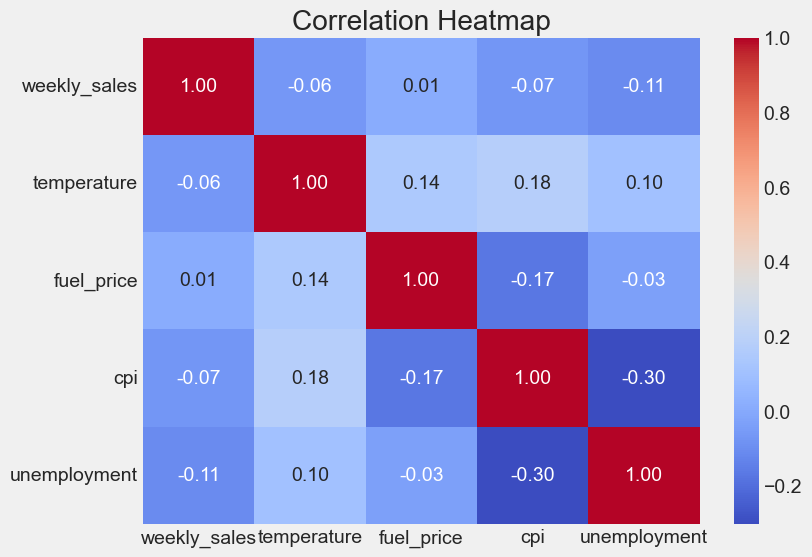

In [22]:
# Heatmap display
plt.figure(figsize=(8, 6))
sns.heatmap(data1_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

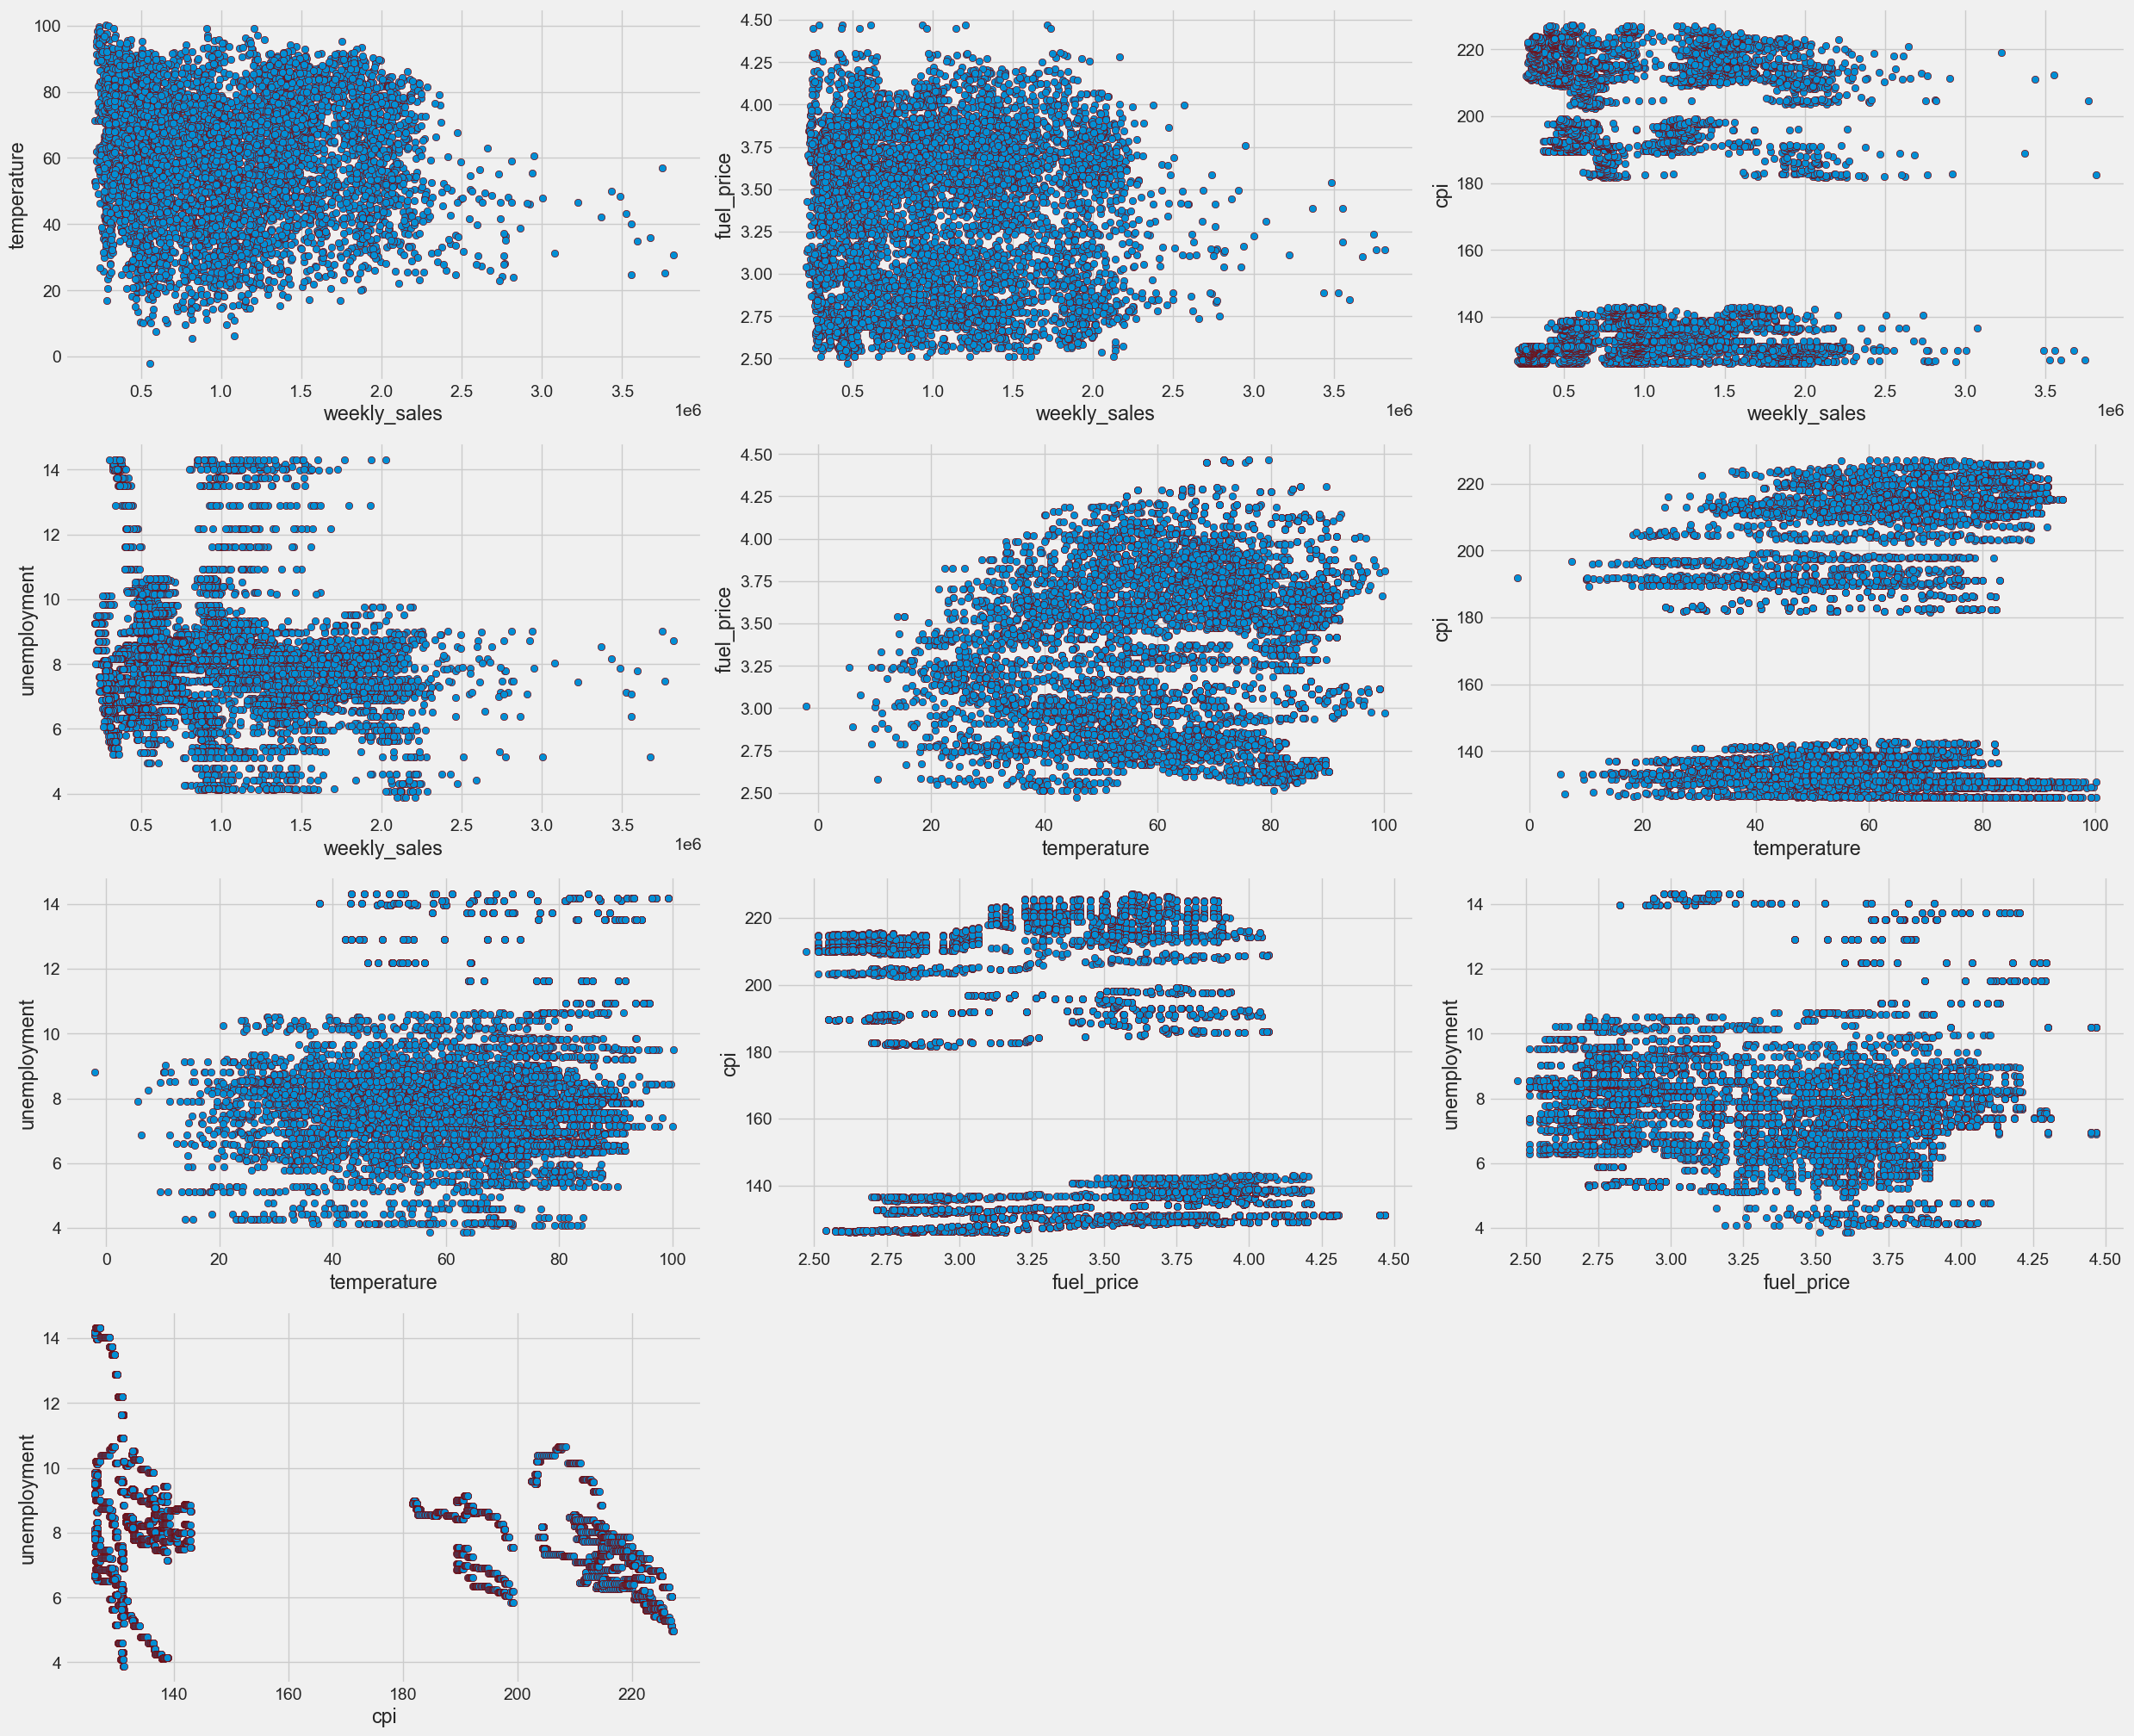

In [23]:
# Identify numerical features, excluding 'store'
columns = data1.columns

# Number of numerical features
num_columns = len(columns)

# Initialize subplot index
plot_index = 1

# Set up the plotting grid
plt.figure(figsize=(25, 35))

# Create scatter plots for each pair of numerical features
for i, columns_x in enumerate(columns):
    for j in range(i + 1, num_columns):
        plt.subplot(7, 3, plot_index)
        sns.scatterplot(data=data1, x=columns_x, y=columns[j], edgecolor='maroon')
        plot_index += 1

# Display all the scatter plots
plt.tight_layout()
plt.show()


In [24]:
# Creating other columns related to date, that will be useful in analysis.

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Extract month from the 'date' column
#data['month'] = data['date'].dt.month

# Extract month name from the 'date' column
data['month_name'] = data['date'].dt.month_name()

# Extract day from the 'date' column
#data['day'] = data['date'].dt.day

# Extract day name of the week
data['day_of_week'] = data['date'].dt.day_name()

# Add a week column
data['week'] = data['date'].dt.isocalendar().week

data.sample(n=3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month_name,day_of_week,week
2923,21,2011-04-22,"801,302.01",working_day,70.79,3.81,215.11,7.93,2011,April,Friday,16
3457,25,2010-07-30,"682,124.34",working_day,71.99,2.78,204.61,7.53,2010,July,Friday,30
6273,44,2012-06-22,"336,241.00",working_day,72.89,3.74,130.79,5.62,2012,June,Friday,25


In [25]:
# Function to determine the season based on the month
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

# Adding a new 'season' column by applying the get_season function to the 'date' column
data['season'] = data['date'].apply(get_season)

# Display the updated DataFrame with the 'season' column
data.sample(n=3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month_name,day_of_week,week,season
1715,12,2012-10-26,"974,697.60",working_day,65.95,4.30,131.19,10.20,2012,October,Friday,43,Autumn
5321,38,2010-09-03,"377,096.55",working_day,83.12,3.09,126.10,14.18,2010,September,Friday,35,Autumn
1993,14,2012-08-31,"1,613,342.19",working_day,75.09,3.87,191.46,8.68,2012,August,Friday,35,Summer


# Calculate the total sales for each holiday flag

In [26]:
# Calculate the total weekly sales for each holiday flag
data2 = data.copy()
holiday_flag_total_sales = data2.groupby('holiday_flag')['weekly_sales'].sum().reset_index() #The reset_index() method converts the grouped result back into a regular DataFrame

# Add a column to format the sales in billions (B)
holiday_flag_total_sales['sales_in_billion'] = holiday_flag_total_sales['weekly_sales'] / 1e9

# Display the DataFrame
print(holiday_flag_total_sales)

  holiday_flag     weekly_sales  sales_in_billion
0  working_day 6,231,919,435.55              6.23
1      holiday   505,299,551.56              0.51


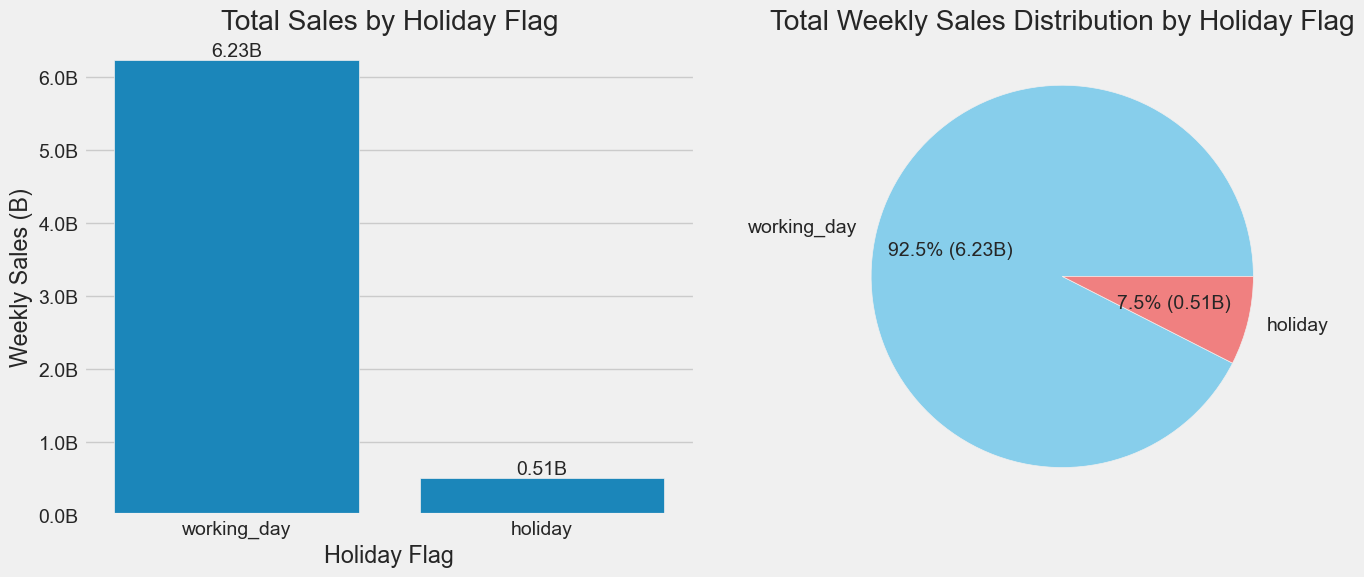

In [27]:
# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot on the first subplot
barplot = sns.barplot(x='holiday_flag', y='weekly_sales', data=data2, estimator=np.sum, ci=None, ax=axs[0])
axs[0].set_title('Total Sales by Holiday Flag')
axs[0].set_xlabel('Holiday Flag')

# Format the y-axis labels to display in billions (B)
axs[0].set_ylabel('Weekly Sales (B)')
axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}B".format(x / 1e9)))

# Add the values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height,
                '{:.2f}B'.format(height / 1e9),
                ha='center', va='bottom')

# Pie chart on the second subplot using holiday_flag_total_sales data
# Calculate the total weekly sales for each holiday flag
holiday_flag_total_sales = data2.groupby('holiday_flag')['weekly_sales'].sum()

# Format the pie chart to show sales in billions (B)
formatted_sales = holiday_flag_total_sales / 1e9
axs[1].pie(formatted_sales, labels=holiday_flag_total_sales.index, autopct=lambda p: '{:.1f}% ({:.2f}B)'.format(p, p * formatted_sales.sum() / 100), colors=['skyblue', 'lightcoral'])
axs[1].set_title('Total Weekly Sales Distribution by Holiday Flag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


# Calculate the average sales for each holiday flag

In [28]:
# Calculate the average weekly sales for each holiday flag
holiday_flag_average_sales = data2.groupby('holiday_flag')['weekly_sales'].mean().reset_index()

# Add a column to format the sales in millions (M)
holiday_flag_average_sales['sales_in_millions'] = holiday_flag_average_sales['weekly_sales'] / 1e6

# Display the DataFrame
print(holiday_flag_average_sales)

  holiday_flag  weekly_sales  sales_in_millions
0  working_day  1,041,256.38               1.04
1      holiday  1,122,887.89               1.12


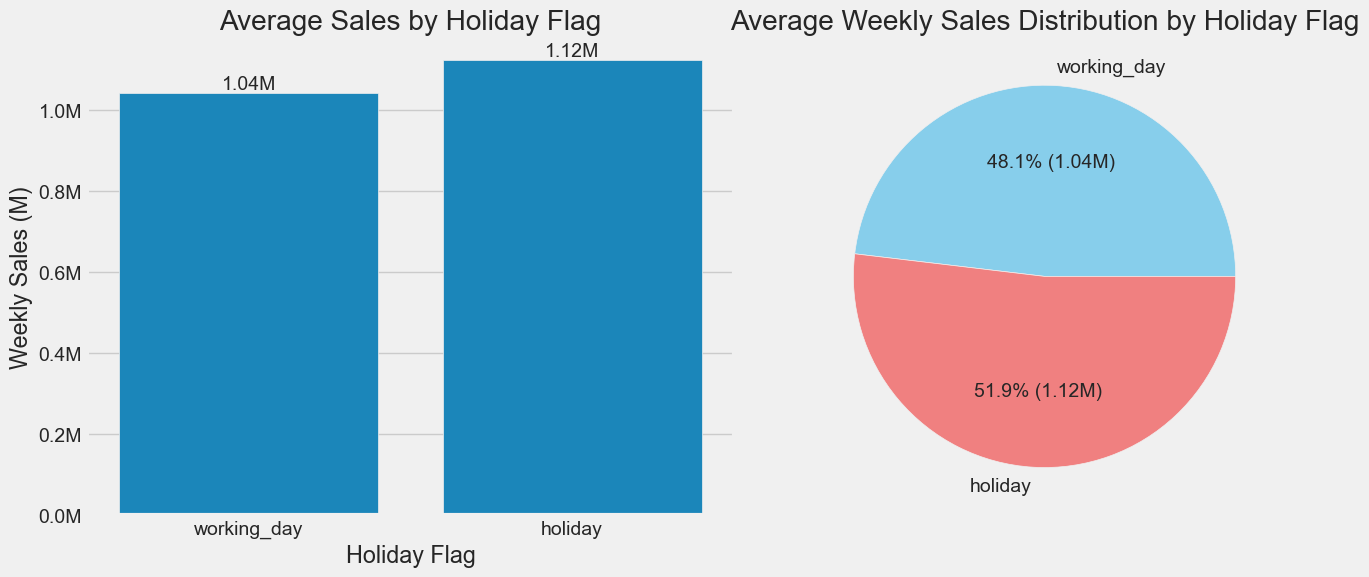

In [29]:
# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot on the first subplot
barplot = sns.barplot(x='holiday_flag', y='weekly_sales', data=data2, estimator=np.mean, ci=None, ax=axs[0])
axs[0].set_title('Average Sales by Holiday Flag')
axs[0].set_xlabel('Holiday Flag')

# Format the y-axis labels to display in millions (M)
axs[0].set_ylabel('Weekly Sales (M)')
axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(x / 1e6)))

# Add the values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height,
                '{:.2f}M'.format(height / 1e6),
                ha='center', va='bottom')

# Pie chart on the second subplot using holiday_flag_total_sales data
# Calculate the total weekly sales for each holiday flag
holiday_flag_average_sales = data2.groupby('holiday_flag')['weekly_sales'].mean()

# Format the pie chart to show sales in millions (M)
formatted_sales = holiday_flag_average_sales / 1e6
axs[1].pie(formatted_sales, labels = holiday_flag_average_sales.index, autopct=lambda p: '{:.1f}% ({:.2f}M)'.format(p, p * formatted_sales.sum() / 100), colors=['skyblue', 'lightcoral'])
axs[1].set_title('Average Weekly Sales Distribution by Holiday Flag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

# Total Sales Each Year

In [30]:
# Calculating total weekly_sales each year
total_year_sales = data.groupby('year')['weekly_sales'].sum().reset_index()

# Adding a column
total_year_sales['sales_in_billions'] = total_year_sales['weekly_sales'] / 1e9

total_year_sales

,year,weekly_sales,sales_in_billions
0,2010,"2,288,886,120.41",2.29
1,2011,"2,448,200,007.35",2.45
2,2012,"2,000,132,859.35",2.00


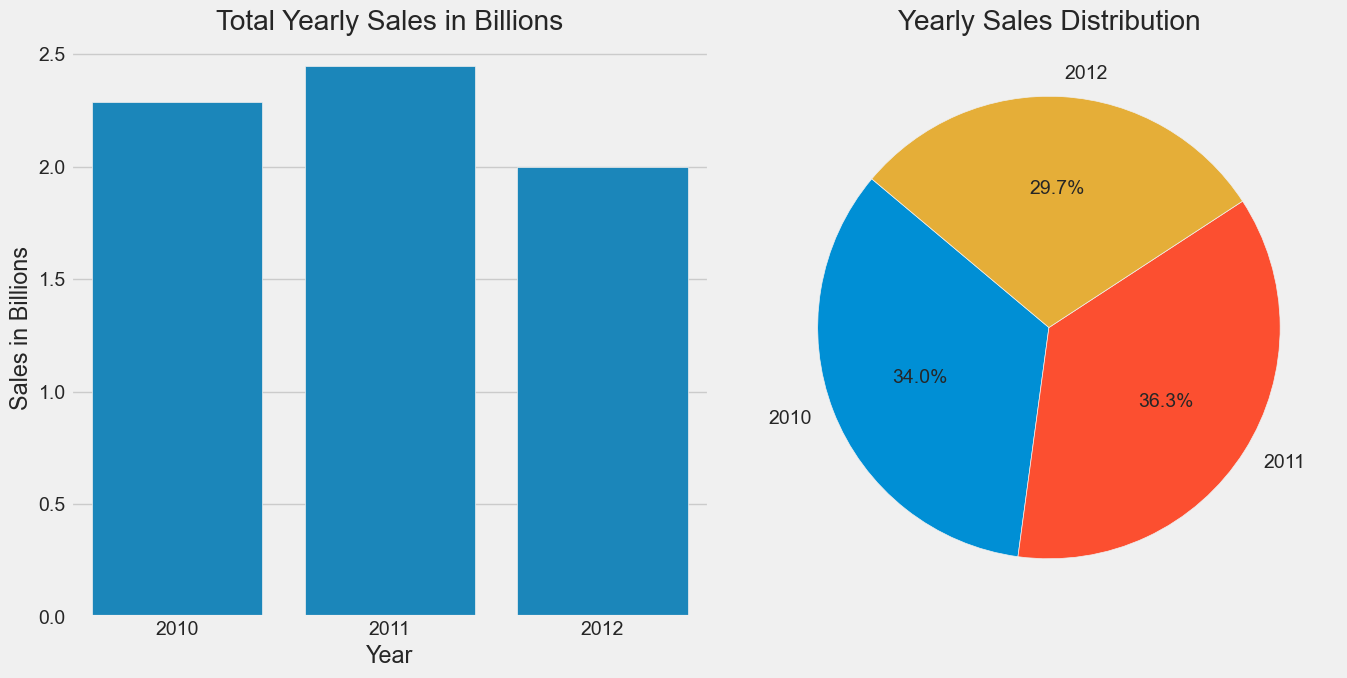

In [31]:
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Barplot for yearly sales in billions
sns.barplot(x='year', y='sales_in_billions', data=total_year_sales, ax=ax[0])
ax[0].set_title('Total Yearly Sales in Billions')
ax[0].set_ylabel('Sales in Billions')
ax[0].set_xlabel('Year')

# Pie chart for the distribution of yearly sales
ax[1].pie(total_year_sales['sales_in_billions'], labels=total_year_sales['year'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Yearly Sales Distribution')

# Display the plot
plt.tight_layout()
plt.show()

# Total Sales each Season

In [32]:
# Calculating total sales each season
total_season_sales = data.groupby('season')['weekly_sales'].sum().reset_index()

# Adding a column
total_season_sales['sales_in_billions'] = total_season_sales['weekly_sales'] / 1e9

total_season_sales

,season,weekly_sales,sales_in_billions
0,Autumn,"1,576,561,691.86",1.58
1,Spring,"1,796,771,258.20",1.80
2,Summer,"1,885,721,072.91",1.89
3,Winter,"1,478,164,964.14",1.48


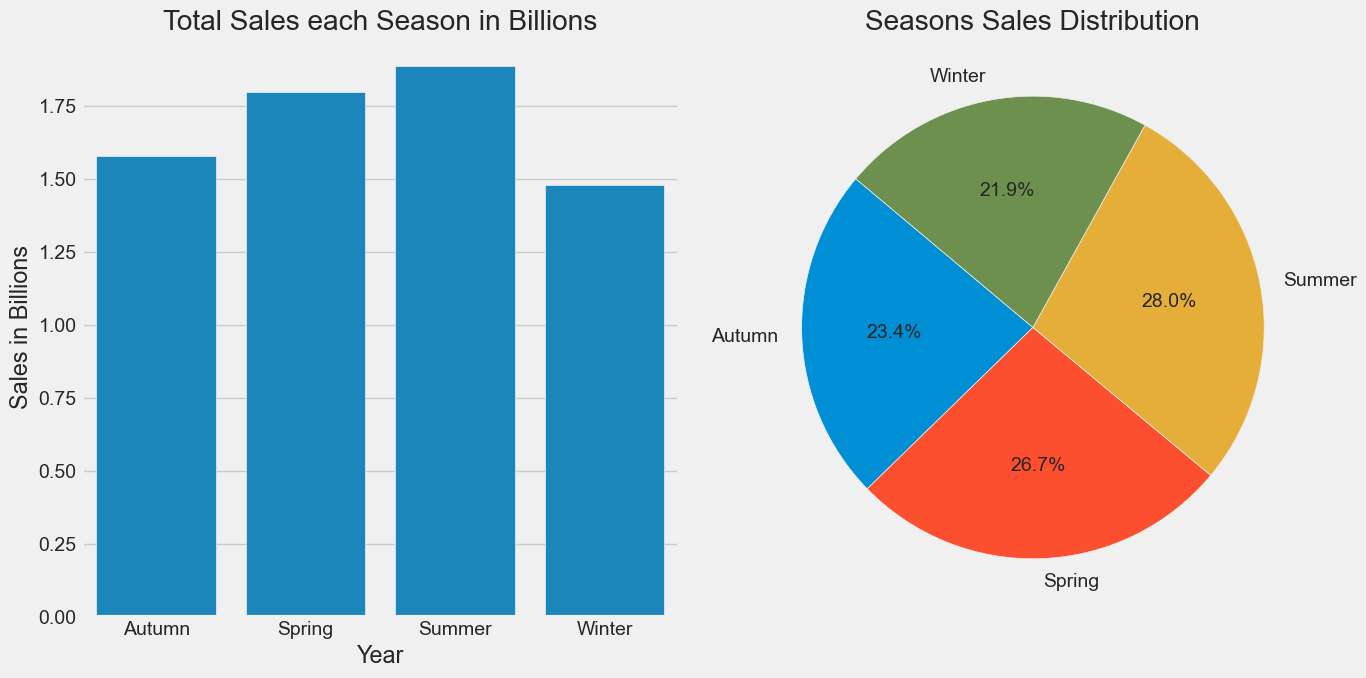

In [33]:
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Barplot for seosonaly sales in billions
sns.barplot(x='season', y='sales_in_billions', data=total_season_sales, ax=ax[0])
ax[0].set_title('Total Sales each Season in Billions')
ax[0].set_ylabel('Sales in Billions')
ax[0].set_xlabel('Year')

# Pie chart for the distribution of yearly sales
ax[1].pie(total_season_sales['sales_in_billions'], labels=total_season_sales['season'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Seasons Sales Distribution')

# Display the plot
plt.tight_layout()
plt.show()

# Total Sales by Season each Year

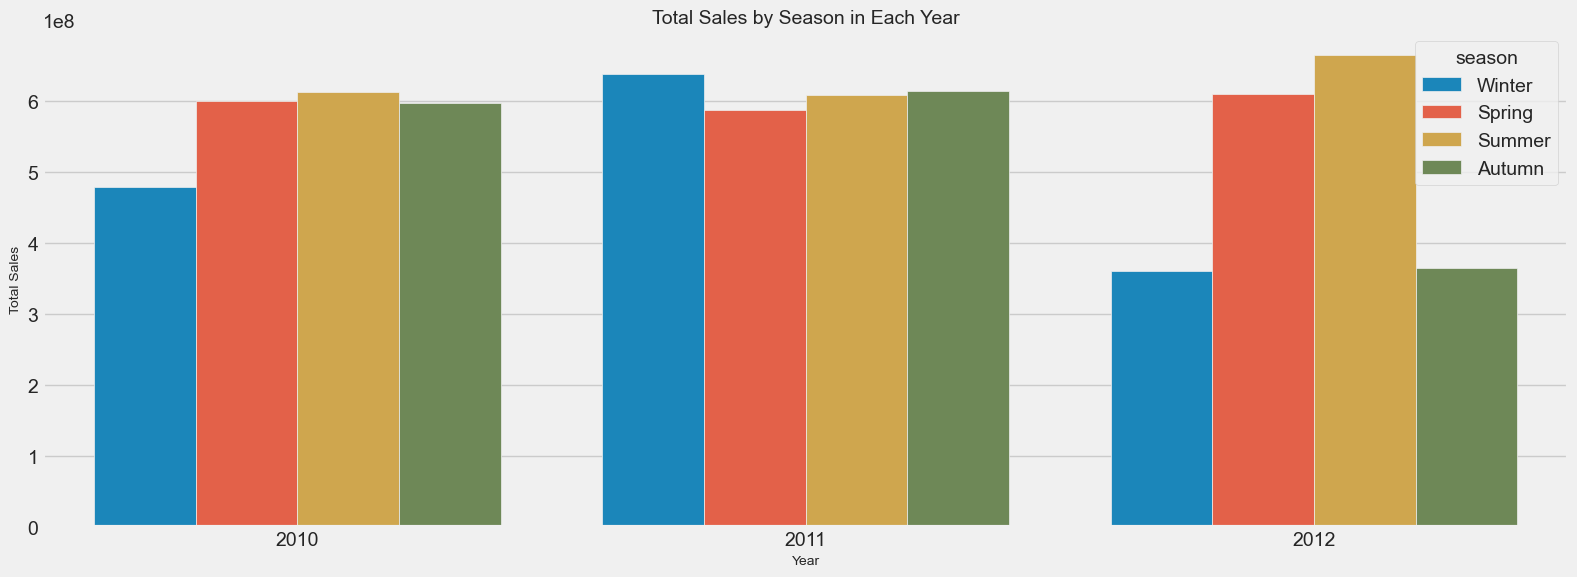

In [34]:
# Create a figure with specified size
plt.figure(figsize=(16, 6))

# Plotting total sales by season in each year
sns.barplot(data=data,
            x='year',
            y='weekly_sales',
            hue='season',
            estimator=np.sum,
            ci=False)

# Adding title and labels 
plt.title('Total Sales by Season in Each Year', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Sales', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


# Total Sales each Month

In [35]:
# Define the correct order of months
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Calculating total sales each month
total_month_sales = data.groupby('month_name')['weekly_sales'].sum().reset_index()

# Converting 'month_name' to a categorical type with the specified order
total_month_sales['month_name'] = pd.Categorical(total_month_sales['month_name'], categories=month_order, ordered=True)

# Sort by 'month_name' to ensure months are in the correct order
total_month_sales = total_month_sales.sort_values('month_name').reset_index(drop=True)

# Add column
total_month_sales['sales_in_millions'] = total_month_sales['weekly_sales'] / 1e6

total_month_sales


,month_name,weekly_sales,sales_in_millions
0,January,"332,598,438.49",332.60
1,February,"568,727,890.45",568.73
2,March,"592,785,901.28",592.79
3,April,"646,859,784.97",646.86
4,May,"557,125,571.95",557.13
5,June,"622,629,886.84",622.63
6,July,"650,000,977.25",650.00
7,August,"613,090,208.82",613.09
8,September,"578,761,179.26",578.76
9,October,"584,784,787.59",584.78


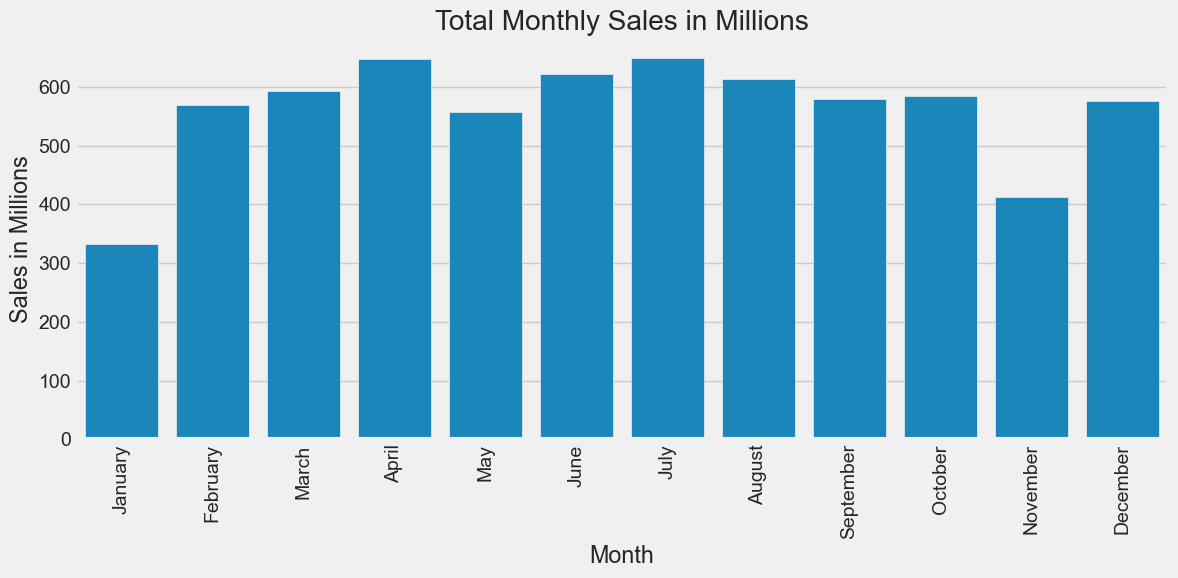

In [36]:
# Creating size of the figure
plt.figure(figsize=(12, 6))

# Barplot for seosonaly sales in millions
sns.barplot(x='month_name', y='sales_in_millions', data = total_month_sales)
plt.title('Total Monthly Sales in Millions')
plt.ylabel('Sales in Millions')
plt.xlabel('Month')
plt.xticks(rotation=90)
# Display the plot
plt.tight_layout()
plt.show()

# Total Sales by Month each Year

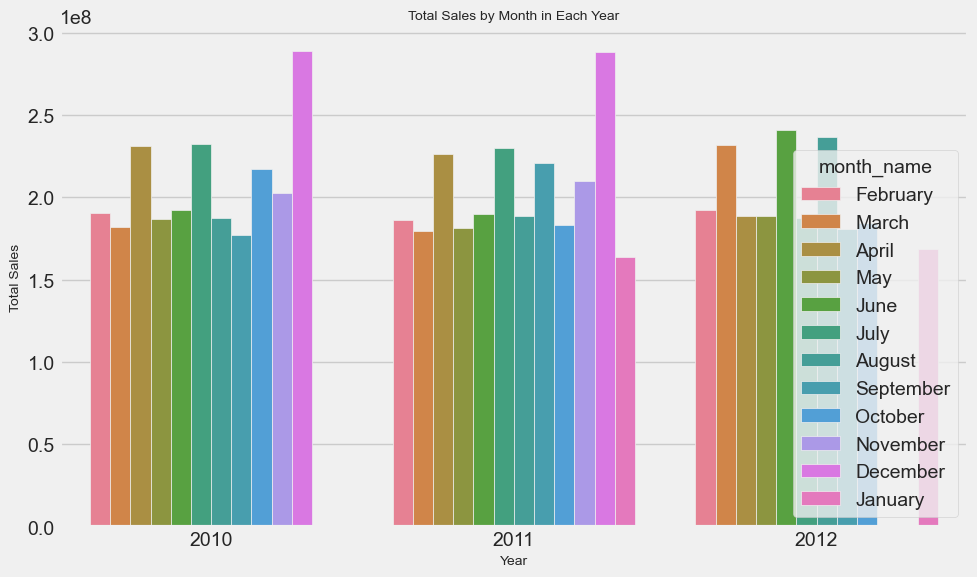

In [45]:
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Plotting total sales by season in each year
sns.barplot(data=data,
            x='year',
            y='weekly_sales',
            hue='month_name',
            estimator=np.sum,
            ci=False)

# Adding title and labels 
plt.title('Total Sales by Month in Each Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Sales', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Store Performance

#### **Top 10 Stores in Sales**

In [46]:
# Calculating total sales for each store
total_store_sales = data.groupby('store')['weekly_sales'].sum().reset_index()

# Add column
total_store_sales['sales_in_millions'] = total_store_sales['weekly_sales'] / 1e6

# Get the top 10 stores by weekly sales
top_10_stores = total_store_sales.nlargest(10, 'weekly_sales')

top_10_stores

,store,weekly_sales,sales_in_millions
19,20,"301,397,792.46",301.40
3,4,"299,543,953.38",299.54
13,14,"288,999,911.34",289.00
12,13,"286,517,703.80",286.52
1,2,"275,382,440.98",275.38
9,10,"271,617,713.89",271.62
26,27,"253,855,916.88",253.86
5,6,"223,756,130.64",223.76
0,1,"222,402,808.85",222.40
38,39,"207,445,542.47",207.45


**Bottom 10 Stores in Sales**

In [47]:
# Get the bottom 10 stores by weekly sales
bottom_10_stores = total_store_sales.nsmallest(10, 'weekly_sales')

bottom_10_stores

,store,weekly_sales,sales_in_millions
32,33,"37,160,221.96",37.16
43,44,"43,293,087.84",43.29
4,5,"45,475,688.90",45.48
35,36,"53,412,214.97",53.41
37,38,"55,159,626.42",55.16
2,3,"57,586,735.07",57.59
29,30,"62,716,885.12",62.72
36,37,"74,202,740.32",74.20
15,16,"74,252,425.40",74.25
28,29,"77,141,554.31",77.14


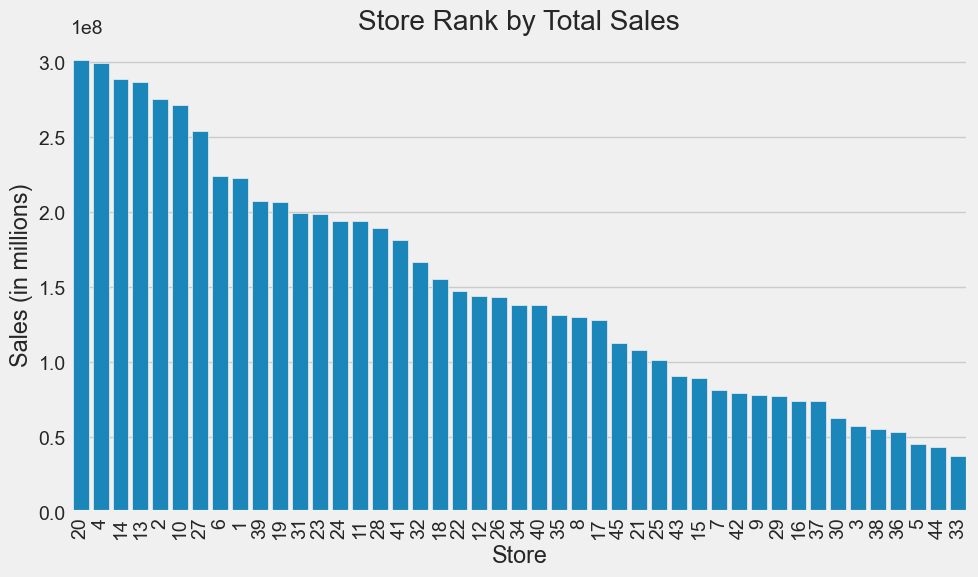

In [48]:
# Sort the top 10 stores by weekly sales for plotting
total_store_sales = total_store_sales.sort_values(by='weekly_sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='store', y='weekly_sales', data=total_store_sales, order=total_store_sales['store'])
plt.title('Store Rank by Total Sales')
plt.xlabel('Store')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


# Sales by Week

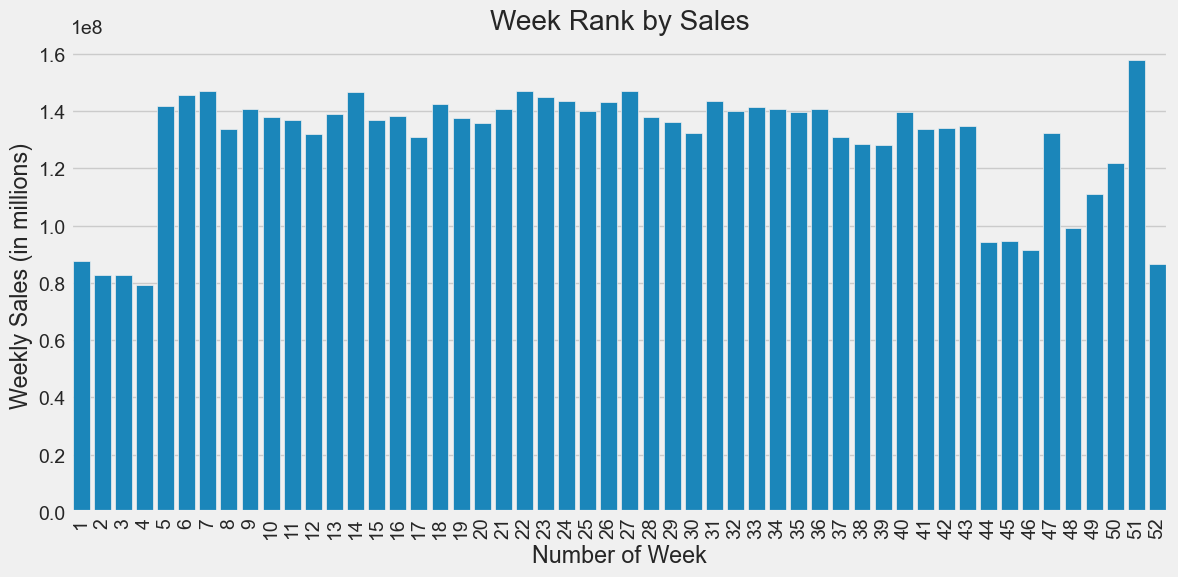

In [49]:
# Calculating total sales for each week
total_weekly_sales = data.groupby('week')['weekly_sales'].sum().reset_index()

# Add column
total_weekly_sales['sales_in_millions'] = total_weekly_sales['weekly_sales'] / 1e6

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='weekly_sales', data=total_weekly_sales, order=total_weekly_sales['week'])
plt.title('Week Rank by Sales')
plt.xlabel('Number of Week')
plt.ylabel('Weekly Sales (in millions)')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

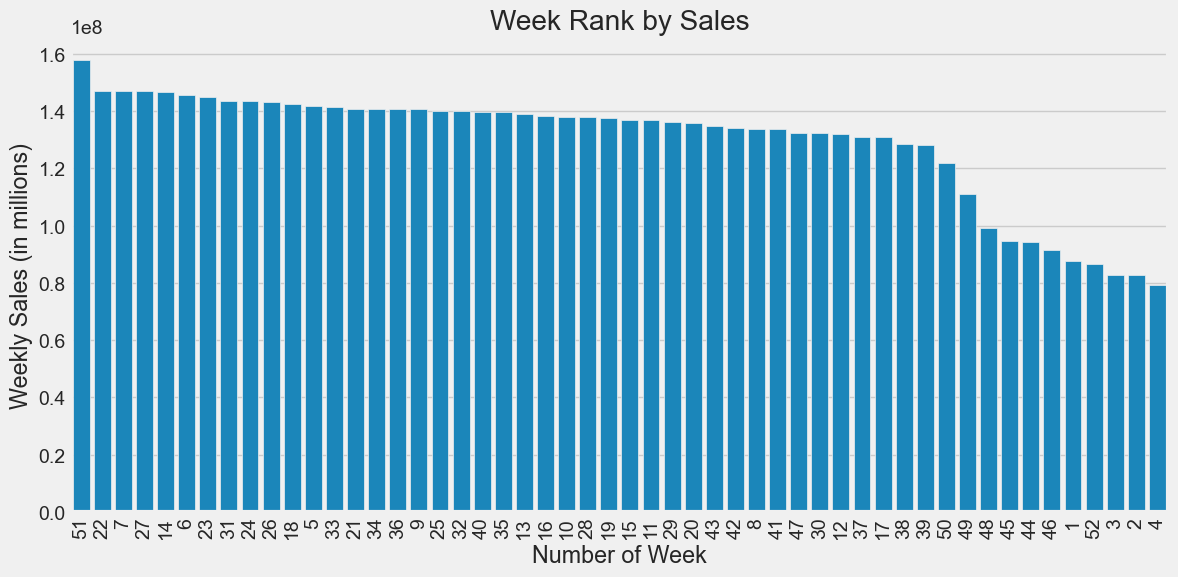

In [50]:
# Sort the top weeks by total sales
sorted_weekly_sales = total_weekly_sales.sort_values(by='weekly_sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='weekly_sales', data=sorted_weekly_sales, order=sorted_weekly_sales['week'])
plt.title('Week Rank by Sales')
plt.xlabel('Number of Week')
plt.ylabel('Weekly Sales (in millions)')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()